In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('../Data/Full_dataset/final_dataset.csv')  

/tmp/ipykernel_5066/2194364756.py:1: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('../Data/Full_dataset/final_dataset.csv')


In [3]:
dataset

,lang,author_id,id,created_at,text,conversation_id,in_reply_to_user_id,date,retweet_count,reply_count,...,place_id,Trending,coordinates.type,coordinates.coordinates,Number_words,Number_non_text,non_text_proportion,trending,Sector,tweet_date
0,es,1455656432,1528163821864554496,2022-05-22 00:00:21+00:00,#NosUnimosONosJodemos\nSi Petro no gana llenan...,1528163821864554496,NaN,2022-05-22T00:00:00Z,0.0,0.0,...,NaN,#NosUnimosONosJodemos,NaN,NaN,29,2,0.068966,#NosUnimosONosJodemos,Derecha,2022-05-22
1,es,1236449853510766592,1528164524364337152,2022-05-22 00:03:09+00:00,#NosUnimosONosJodemos se van a quedar con la b...,1528164524364337152,NaN,2022-05-22T00:00:00Z,0.0,0.0,...,NaN,#NosUnimosONosJodemos,NaN,NaN,29,1,0.034483,#NosUnimosONosJodemos,Derecha,2022-05-22
2,es,2344092743,1528163881960583168,2022-05-22 00:00:36+00:00,Las encuentas verdaderas son las de las calles...,1528163881960583168,NaN,2022-05-22T00:00:00Z,0.0,0.0,...,NaN,#NosUnimosONosJodemos,NaN,NaN,22,3,0.136364,#NosUnimosONosJodemos,Derecha,2022-05-22
3,es,255783158,1528164587140431872,2022-05-22 00:03:24+00:00,#NosUnimosONosJodemos Petro y Francia la renov...,1528164587140431872,NaN,2022-05-22T00:00:00Z,0.0,0.0,...,NaN,#NosUnimosONosJodemos,NaN,NaN,8,1,0.125000,#NosUnimosONosJodemos,Derecha,2022-05-22
4,es,1481127220714348547,1528164266150436865,2022-05-22 00:02:07+00:00,#NosUnimosONosJodemos así de claro es la vaina,1528164266150436865,NaN,2022-05-22T00:00:00Z,0.0,0.0,...,NaN,#NosUnimosONosJodemos,NaN,NaN,7,1,0.142857,#NosUnimosONosJodemos,Derecha,2022-05-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193343,es,1336720446973235202,1539756938187231236,2022-06-22 23:47:16+00:00,#LosImpuestosDePetro\nLa idea no era todo grat...,1539756938187231236,NaN,2022-06-22T23:40:00Z,0.0,0.0,...,NaN,#LosImpuestosDePetro,NaN,NaN,13,1,0.076923,#LosImpuestosDePetro,Neutro,2022-06-22
193344,es,1275895677239857153,1539759865643601920,2022-06-22 23:58:53+00:00,#LosImpuestosDePetro deberían también ser apli...,1539759865643601920,NaN,2022-06-22T23:50:00Z,19.0,6.0,...,NaN,#LosImpuestosDePetro,NaN,NaN,48,1,0.020833,#LosImpuestosDePetro,Neutro,2022-06-22
193345,es,87009246,1539758385566031874,2022-06-22 23:53:01+00:00,Los veo muy preocupados por reforma tributaria...,1539758385566031874,NaN,2022-06-22T23:50:00Z,0.0,1.0,...,NaN,#LosImpuestosDePetro,NaN,NaN,43,1,0.023256,#LosImpuestosDePetro,Neutro,2022-06-22
193346,es,760914847102070784,1539758097677312004,2022-06-22 23:51:52+00:00,#LosImpuestosDePetro para cuando los congresis...,1539758097677312004,NaN,2022-06-22T23:50:00Z,0.0,0.0,...,NaN,#LosImpuestosDePetro,NaN,NaN,21,1,0.047619,#LosImpuestosDePetro,Neutro,2022-06-22


In [4]:
predictions = pd.read_csv('../Data/Full_dataset/model_predictions_probs.csv')
predictions = predictions>0.5
predictions.columns = ['Alegria' , 'Miedo' ,'Tristeza','Asco']

In [5]:
dataset[predictions.columns ] = predictions

In [11]:
 predictions.columns

Index(['Alegria', 'Miedo', 'Tristeza', 'Asco'], dtype='object')

In [8]:
test_predictions = pd.read_csv('../Data/Full_dataset/test_predictions.csv')[['text', 'labels'] + predictions.columns]

ValueError: operands could not be broadcast together with shapes (2,) (4,) 

In [7]:
test_predictions

,text,labels,input_ids,token_type_ids,attention_mask,Alegria,Miedo,Tristeza,Asco
0,Desde que salió Daniel Coronell de ese pasquín...,[0. 0. 0. 1.],[ 0 989 443 3631 5668 10535 2138 4...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...,0.0,0.0,0.0,1.0
1,hashtag exguerrillero oingeniero a ojo cerrado...,[1. 0. 0. 1.],[ 0 467 235 604 13538 13879 575 4...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...,1.0,0.0,0.0,1.0
2,RT emoji flechas verticales en sentido horari...,[1. 0. 0. 0.],[ 0 1354 235 424 10831 22239 452 30...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...,1.0,0.0,0.0,0.0
3,Que les pasa a estos idiotas diciendo que hash...,[0. 0. 0. 1.],[ 0 443 835 1193 412 1335 11726 29...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...,0.0,0.0,0.0,1.0
4,"Quería irme de mi país, en serio, pero ahora m...",[1. 0. 0. 0.],[ 0 2962 5738 413 507 5097 452 103...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
211,"@usuario Hola Argiro, buen día, desde que voté...",[1. 0. 0. 0.],[ 0 431 1878 605 1128 4243 680 42...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...,1.0,0.0,0.0,0.0
212,La política está en su máxima expresión día a ...,[0. 0. 0. 1.],[ 0 446 2327 755 452 523 8364 39...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...,0.0,0.0,0.0,1.0
213,hashtag mi candidato es el que realmente a pue...,[1. 0. 0. 0.],[ 0 467 235 507 6173 442 459 4...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...,1.0,0.0,0.0,0.0
214,"@usuario El nuevo liberalismo, el verdadero nu...",[1. 0. 0. 0.],[ 0 431 459 1263 11874 4786 459 56...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...,1.0,0.0,0.0,0.0


In [7]:
counts_general = dataset[predictions.columns].apply(pd.Series.value_counts).loc[True]

In [8]:
counts = dataset[list(predictions.columns) +  ['Sector']].groupby('Sector').sum().reset_index()
counts_sector = dataset[['Sector']].groupby('Sector').count()
tweets_per_sector =dataset['Sector'].value_counts()

In [9]:
fig = px.bar(counts_general, x=counts_general.index, y=counts_general.values)
fig.show()

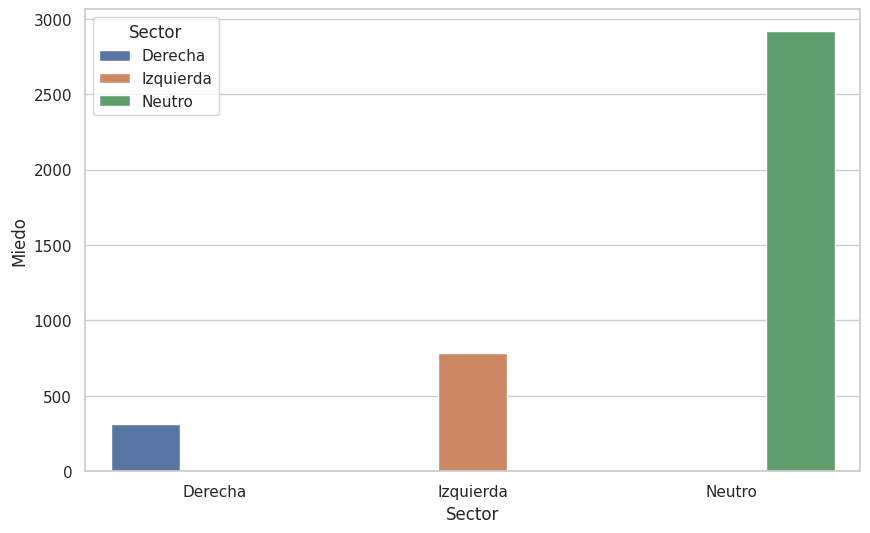

In [14]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
fig = sns.barplot(x='Sector', y='Miedo', hue='Sector', data=counts)
plt.show()

In [31]:
tweets_per_sector.index

Index(['Neutro', 'Izquierda', 'Derecha'], dtype='object')

In [47]:
for i in tweets_per_sector.index:
    print(i)
    #counts.loc[counts['Sector'] == i][predictions.columns] = counts.loc[counts['Sector'] == i][predictions.columns]/2

Neutro
Izquierda
Derecha


In [17]:
tweets_per_sector =dataset['Sector'].value_counts()

In [48]:
counts.loc[counts['Sector'] == i][predictions.columns] = counts.loc[counts['Sector'] == i][predictions.columns]/2

/home/juanjo/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [54]:
counts.loc[counts['Sector'] == i][predictions.columns] = counts.loc[counts['Sector'] == i][predictions.columns]/2

/home/juanjo/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [57]:
counts[predictions.columns].loc[0] = counts[predictions.columns].loc[0]/2

/home/juanjo/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1797: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [70]:
counts.iloc[0, 1:] = counts.iloc[0, 1:] /2 

In [73]:
tweets_per_sector[counts.iloc[0, 0]]

38164

In [68]:
tweets_per_sector

Neutro       90113
Izquierda    65071
Derecha      38164
Name: Sector, dtype: int64

In [78]:
counts

,Sector,Alegria,Miedo,Tristeza,Asco
0,Derecha,0.289461,0.008280,0.003773,0.687742
1,Izquierda,0.556085,0.012064,0.007745,0.407125
2,Neutro,0.331839,0.032382,0.054054,0.545127


In [91]:
counts_normalized = counts.copy()
for i in range(3):
    counts_normalized.iloc[i, 1:] = counts_normalized.iloc[i, 1:]/tweets_per_sector[counts.iloc[i, 0]]
counts_normalized = counts_normalized.round(3)

In [90]:
counts_normalized.round(3)

,Sector,Alegria,Miedo,Tristeza,Asco
0,Derecha,0.289,0.008,0.004,0.688
1,Izquierda,0.556,0.012,0.008,0.407
2,Neutro,0.332,0.032,0.054,0.545


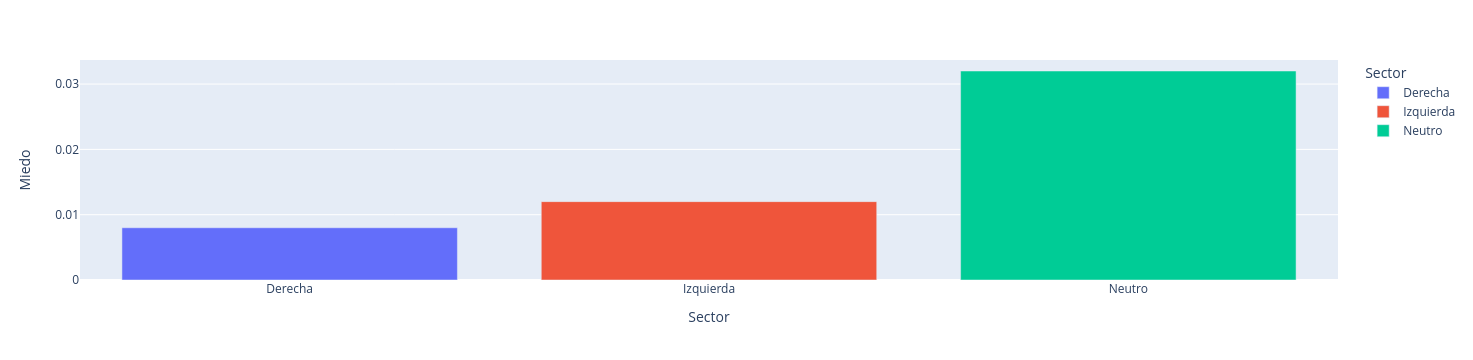

In [94]:
fig = px.bar(counts_normalized , x='Sector', y='Miedo', color='Sector')
fig.show()

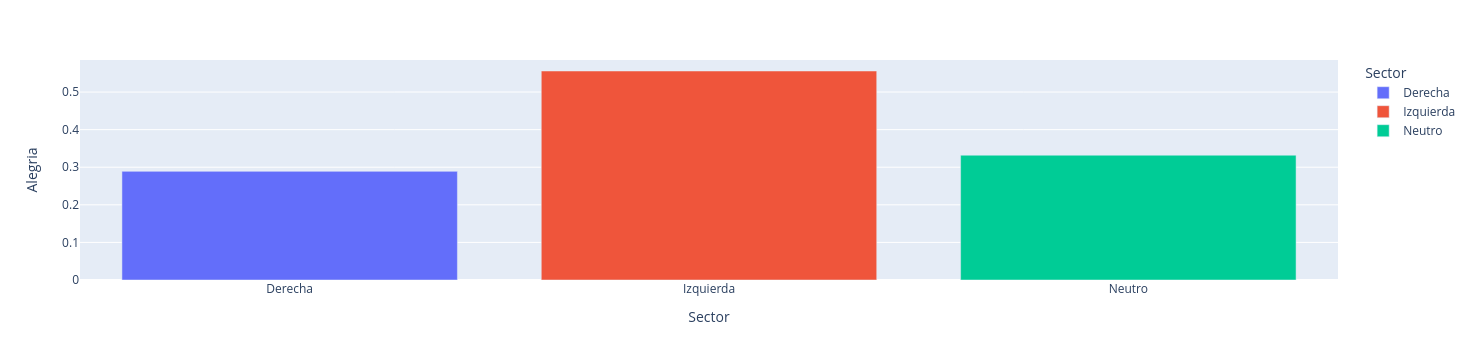

In [95]:
fig = px.bar(counts_normalized, x='Sector', y='Alegria', color='Sector')
fig.show()

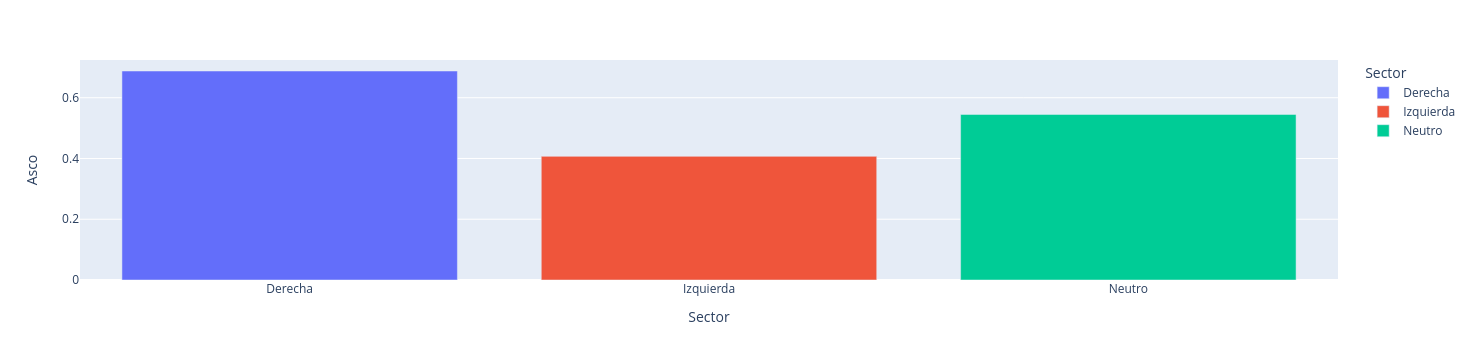

In [96]:
fig = px.bar(counts_normalized, x='Sector', y='Asco', color='Sector')
fig.show()

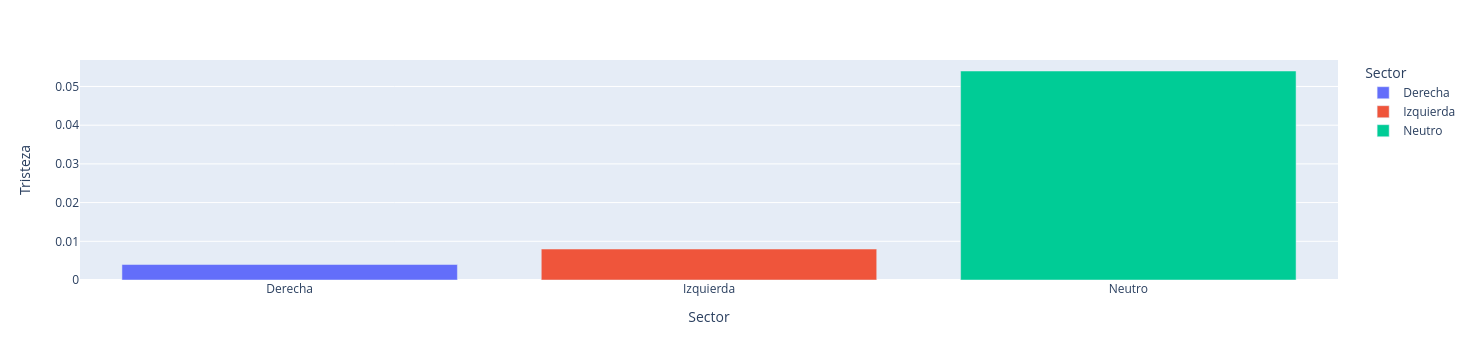

In [97]:
fig = px.bar(counts_normalized, x='Sector', y='Tristeza', color='Sector')
fig.show()

In [63]:
df_dates = dataset[list(predictions.columns) +  ['tweet_date']].groupby(['tweet_date']).sum().reset_index()
df_dates_percent = df_dates.copy()
df_dates_percent.iloc[:, 1:] =  df_dates_percent.iloc[:, 1:]/column_sums
df_dates_sector = dataset[list(predictions.columns) +  ['tweet_date', 'Sector']].groupby(['tweet_date', 'Sector']).sum().reset_index()
df_dates_sector_percent = df_dates_sector.copy()
totals = df_dates_sector.groupby(['Sector']).sum()


In [72]:
for i in totals.index:
    for j in totals.columns[1:]:
        df_dates_sector_percent.loc[(df_dates_sector_percent['Sector'] == i),j] = df_dates_sector_percent.loc[
            (df_dates_sector_percent['Sector'] == i),j]/totals.loc[i,j]


In [24]:
fig = px.line(df_dates_percent, x='tweet_date', y=df_dates.columns[1:]).update_layout(
    title={"text": "Cantidad de Tweets por fecha", "x": 0.5}, yaxis_title="Cantidad de Tweets", xaxis_title="Fecha")
fig.show()

In [73]:
fig = px.line(df_dates_sector_percent, x='tweet_date', y=['Alegria'],  color="Sector").update_layout(
    title={"text": "Cantidad de Tweets por fecha", "x": 0.5}, yaxis_title="Cantidad de Tweets", xaxis_title="Fecha")
fig.show()

In [74]:
fig = px.line(df_dates_sector_percent, x='tweet_date', y=['Miedo'],  color="Sector").update_layout(
    title={"text": "Cantidad de Tweets por fecha", "x": 0.5}, yaxis_title="Cantidad de Tweets", xaxis_title="Fecha")
fig.show()

In [76]:
fig = px.line(df_dates_sector_percent, x='tweet_date', y=['Tristeza'],  color="Sector").update_layout(
    title={"text": "Cantidad de Tweets por fecha", "x": 0.5}, yaxis_title="Cantidad de Tweets", xaxis_title="Fecha")
fig.show()

In [77]:
fig = px.line(df_dates_sector_percent, x='tweet_date', y=['Asco'],  color="Sector").update_layout(
    title={"text": "Cantidad de Tweets por fecha", "x": 0.5}, yaxis_title="Cantidad de Tweets", xaxis_title="Fecha")
fig.show()